In [1]:
'''
I will start an experiment about How we can make a classifier of MNIST using machine learning algorithms. 
First, I need to use gpu acceleration when jupyter notebook is running. Create a python code followed that order.
'''
import tensorflow as tf

2024-11-11 12:12:37.127431: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-11 12:12:37.932563: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
# Check for available devices

gpus = tf.config.experimental.list_physical_devices('GPU')

# If GPUs are found, use the first one
if gpus:
    # Restrict TensorFlow to use only the first GPU
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
        logical_gpus = tf.config.experimental.list_logical_devices('GPU')
        print(logical_gpus)
    except RuntimeError as e:
        print(e)
    # Memory growth may not be supported on all GPUs

2024-11-11 12:12:39.737659: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:05:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-11 12:12:39.891481: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1960] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [3]:
'''
And next, we have to connect train and test file from kaggle 
competiton “Digit Recognizer”.
After connection of datasets, We need to find a missing values and handle it from both connected datasets.
Find a way to find and handle missing values, and create a python code followed that way.
'''
# 1. Importing Libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [4]:
# 2.Downloading MNIST Dataset 
'''
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
'''

# Transforming with a dataset provided by Kaggle
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

In [5]:
# 3. Finding Missing Values
missing_train_values = np.isnan(train_df).any()
missing_test_values = np.isnan(test_df).any()

missing_train_indices = np.where(np.isnan(train_df))
missing_test_indices = np.where(np.isnan(test_df))

'''
# 4. Handling Missing Values
if missing_train_values:
    # Drop rows with missing values in training data
    train_df = train_df.dropna()
if missing_test_values:
    test_df = test_df.dropna()
'''

'\n# 4. Handling Missing Values\nif missing_train_values:\n    # Drop rows with missing values in training data\n    train_df = train_df.dropna()\nif missing_test_values:\n    test_df = test_df.dropna()\n'

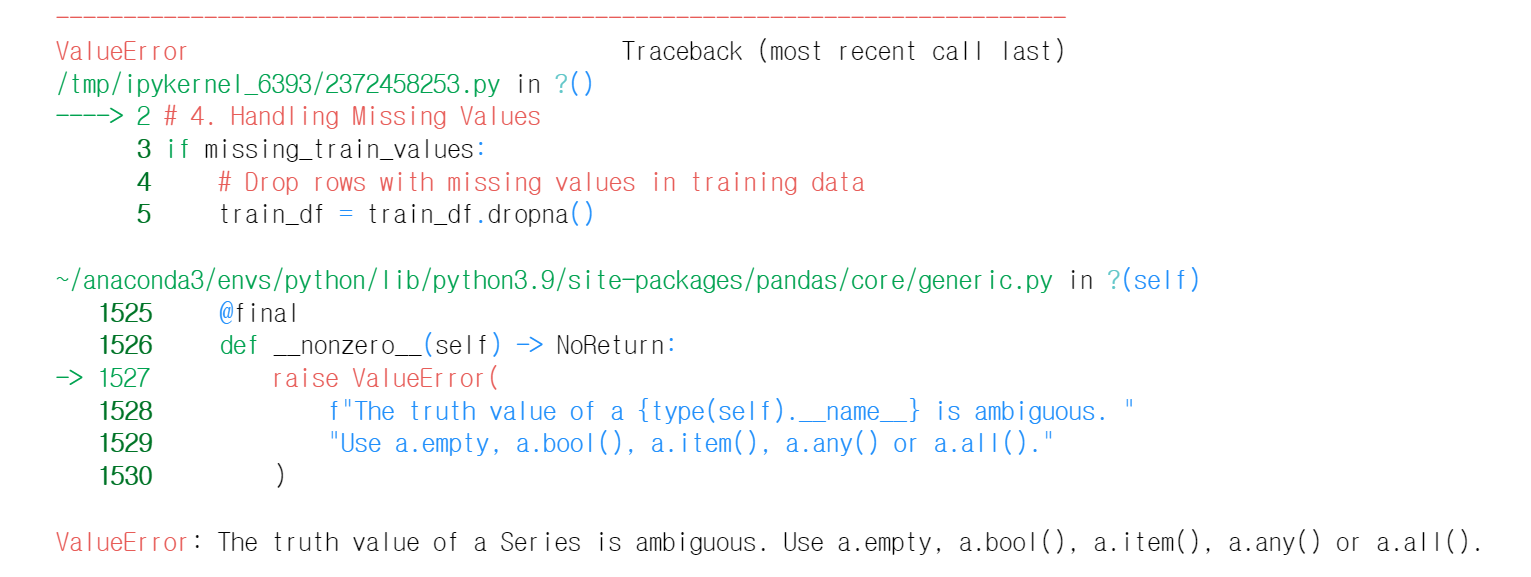
### 에러 발생 -> 개발자의 판단하에 아래 코드로 수정

In [6]:
# 4. Handling Missing Values
if missing_train_values.any():
    # Drop rows with missing values in training data
    train_df = train_df.dropna()
if missing_test_values.any():
    test_df = test_df.dropna()

In [7]:
label = train_df['label']
train_df.drop(['label'], axis = 1, inplace= True)
# 5. Splitting Train/Test Data 

X_train, X_val, y_train, y_val = train_test_split(train_df, label, test_size=0.2, random_state=42)

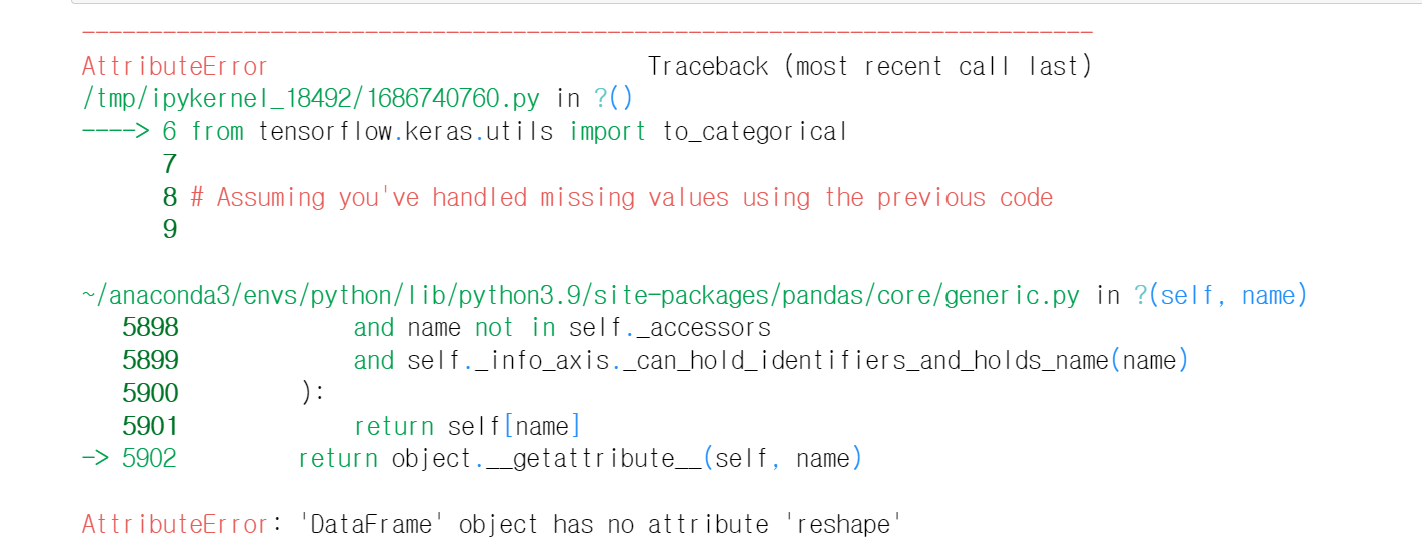
### 에러 발생 -> 개발자의 판단에 따라 아래와 같이 에러 발생 코드 수정

In [8]:
'''
After handling missing values, preprocessing should be the next step. 
Find a way to preprocess datasets before training classifier with python codes.
'''
from tensorflow.keras.utils import to_categorical

# Assuming you've handled missing values using the previous code

# Code added by the developer for modifications
X_train_cnn = X_train.values
X_val_cnn  = X_val.values

# Reshape data (if needed) 
X_train_cnn  = X_train_cnn.reshape(X_train.shape[0], 28, 28, 1)  # Reshape for 2D convolutional layers
X_val_cnn  = X_val_cnn.reshape(X_val.shape[0], 28, 28, 1)

# Normalize data
X_train_cnn = X_train_cnn.astype('float32') / 255  # Normalize pixel values between 0 and 1
X_val_cnn = X_val_cnn.astype('float32') / 255

# One-hot encode labels (if needed for classification)
# No further code execution based on the developer's judgment

y_train_cnn = to_categorical(y_train)
y_val_cnn = to_categorical(y_val)

# test_df: test_df added based on the developer's judgment
test_df_cnn = test_df.values.reshape(test_df.shape[0], 28, 28, 1).astype('float32') / 255
test_df = test_df / 255

In [9]:
# Data frame preprocessing
X_train = X_train.astype('float32') / 255  # Normalize pixel values between 0 and 1
X_val = X_val.astype('float32') / 255

In [10]:
import xgboost
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, accuracy_score

#random forest
rmf = RandomForestClassifier()
rmf.fit(X_train, y_train)
y_pred = rmf.predict(X_val)
acc_rmf = accuracy_score(y_val, y_pred)

#xgboost
xgb = xgboost.XGBClassifier()
xgb.fit(X_train, y_train)
y_pred = xgb.predict(X_val)
acc_xgb = accuracy_score(y_val, y_pred)

#voting ensemble model
ves = VotingClassifier(estimators=[("Random Forest",rmf),
                                               ("XGBoost",xgb)],
                                  voting = 'soft')
ves.fit(X_train,y_train)
y_pred = ves.predict(X_val)
acc_vt = accuracy_score(y_val, y_pred)

print("Random Forest : ", acc_rmf)
print("Xgboost : ", acc_xgb)
print("Voting Ensemble : ", acc_vt)


KeyboardInterrupt



In [13]:
sample = pd.read_csv('./sample_submission.csv')
ImageId = sample['ImageId']

Y_pred_rmf = rmf.predict(test_df)
submission = pd.DataFrame({
    "ImageId" : ImageId,
    "Label" : Y_pred_rmf
})
submission.to_csv('Gemini_rmf.csv', index = False)
# kaggle score : 0.9603 -> 다시 확인 필요

Y_pred_xgb = xgb.predict(test_df)
submission = pd.DataFrame({
    "ImageId" : ImageId,
    "Label" : Y_pred_xgb
})
submission.to_csv('Gemini_xgb.csv', index = False)
# kaggle score : 0.9632

Y_pred_ves = ves.predict(test_df)
submission = pd.DataFrame({
    "ImageId" : ImageId,
    "Label" : Y_pred_ves
})
submission.to_csv('Gemini_ves.csv', index = False)
# kaggle score : 0.9655

In [ ]:
'''
In this step, We can build classifier of MNIST dataset. 
So, we have to find algorithms for building classification. 
Find classification algorithms of datasets we dealt, and create a python code.
'''

# Logistic regression 모델은 진행하지 않음
'''
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression

# Assuming you have preprocessed data (x_train, y_train, x_test, y_test)

# Create and train the model
model = LogisticRegression(solver='lbfgs')
model.fit(x_train, y_train)

# Make predictions on test data
y_pred = model.predict(x_test)

# Evaluate model performance (accuracy, precision, recall, etc.)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f"Logistic Regression Accuracy: {accuracy:.4f}")
'''

In [10]:
# 2. CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

# Assuming you have preprocessed data (x_train, y_train, x_test, y_test)

# Define the CNN model
# Design method modified while maintaining the hierarchy based on the developer's judgment
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')  # 10 output units for 10 digits
])


# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [12]:
model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32)  # Adjust hyperparameters as needed

# Evaluate model performance
test_loss, test_acc = model.evaluate(X_val_cnn, y_val_cnn)
print(f"CNN Test Accuracy: {test_acc:.4f}")
# test accuracy : 0.9814

Epoch 1/10
1050/1050 [==============================] - 9s 8ms/step - loss: 0.1948 - accuracy: 0.9419
Epoch 2/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0638 - accuracy: 0.9802
Epoch 3/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0405 - accuracy: 0.9873
Epoch 4/10
1050/1050 [==============================] - 8s 8ms/step - loss: 0.0268 - accuracy: 0.9917
Epoch 5/10
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0173 - accuracy: 0.9943
Epoch 6/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0133 - accuracy: 0.9957
Epoch 7/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0121 - accuracy: 0.9961
Epoch 8/10
1050/1050 [==============================] - 7s 7ms/step - loss: 0.0085 - accuracy: 0.9971
Epoch 9/10
1050/1050 [==============================] - 9s 8ms/step - loss: 0.0060 - accuracy: 0.9978
Epoch 10/10
263/263 [==============================] - 0s 1ms/step - loss: 0.0651 

In [14]:
model.save('./gemini_cnn.h5')

/home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [15]:
# prediction에 대한 코드 -> 개발자가 직접 코딩
y_pred = model.predict(test_df_cnn)
pred_sub = []
for idx in y_pred:
    idx_pred = np.argmax(idx)
    pred_sub.append(idx_pred)
    
sub = pd.read_csv('./sample_submission.csv')
sub['Label'] = pred_sub
sub.to_csv('./Gemini_cnn.csv', index=False)
# kaggle score : 0.9801

875/875 [==============================] - 1s 1ms/step


In [16]:
'''
According to the above answer, use hyperparameter tuning technique for improving performance of classifier based on CNN algorithm. 
Find python tools for hyperparameter tuning with example code.
'''
# Reconstruct the code generated by Gemini using the official Keras documentation.

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from kerastuner import HyperModel
from kerastuner.tuners import RandomSearch

def build_model(hp):
    model = Sequential()
    model.add(keras.layers.Conv2D(
        filters=hp.Int('filters', min_value=32, max_value=128, step=32),
        kernel_size=(3, 3), 
        activation='relu', 
        input_shape=(28, 28, 1)))
    model.add(MaxPooling2D((2, 2)))
        
    # Add more convolutional layers with hyperparameter tuning (e.g., kernel size, activation)
    model.add(Flatten())

    model.add(keras.layers.Dense(
        units=hp.Int('units', min_value=64, max_value=256, step=64), 
        activation='relu'))
        
    model.add(keras.layers.Dense(10, activation='softmax')) # 10 units for 10 digits
    
    model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', min_value=1e-4, max_value=1e-3)),
                loss='categorical_crossentropy', metrics=['accuracy'])
    return model

/tmp/ipykernel_233427/2085243284.py:10: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import HyperModel


In [17]:
import keras_tuner
import keras

import time
LOG_DIR = f"{int(time.time())}"

tuner = keras_tuner.RandomSearch(hypermodel=build_model,
                                 objective='val_accuracy',  # Optimize for validation accuracy
                                 max_trials=50,
                                 max_consecutive_failed_trials = 100,
                                 directory = LOG_DIR# Adjust number of trials
                                )  # Run each configuration 3 times for stability

In [18]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
    def on_train_end(*args, **kwargs):
        IPython.display.clear_output(wait = True)

In [19]:
tuner.search(X_train_cnn, y_train_cnn, epochs=5, validation_data=(X_val_cnn, y_val_cnn), callbacks = [ClearTrainingOutput()]) 
# 01h 12m 19s

Trial 50 Complete [00h 01m 38s]

Best val_accuracy So Far: None
Total elapsed time: 01h 05m 15s


In [20]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
model = tuner.hypermodel.build(best_hps)

In [25]:
best_hps.values

{'filters': 64, 'units': 192, 'learning_rate': 0.0006204973620678251}

In [22]:
model.summary()
model.save('keras_tuner_2.h5')

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 10816)             0         
                                                                 
 dense_2 (Dense)             (None, 192)               2076864   
                                                                 
 dense_3 (Dense)             (None, 10)                1930      
                                                                 
Total params: 2079434 (7.93 MB)
Trainable params: 2079434 (7.93 MB)
Non-trainable params: 0 (0.00 Byte)
________________

/home/dummy/anaconda3/envs/python/lib/python3.9/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [23]:
model.fit(X_train_cnn, y_train_cnn, epochs=10, batch_size=32)

test_loss, test_acc = model.evaluate(X_val_cnn, y_val_cnn)
print(f"CNN Test Accuracy: {test_acc:.4f}")
# test accuracy : 0.9871

Epoch 1/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.2030 - accuracy: 0.9388
Epoch 2/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0646 - accuracy: 0.9799
Epoch 3/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0407 - accuracy: 0.9878
Epoch 4/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0272 - accuracy: 0.9912
Epoch 5/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0180 - accuracy: 0.9945
Epoch 6/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0117 - accuracy: 0.9966
Epoch 7/10
1050/1050 [==============================] - 12s 11ms/step - loss: 0.0101 - accuracy: 0.9968
Epoch 8/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0064 - accuracy: 0.9983
Epoch 9/10
1050/1050 [==============================] - 11s 11ms/step - loss: 0.0066 - accuracy: 0.9978
Epoch 10/10
263/263 [==============================] - 1s 2ms/st

In [24]:
pred_sub = []
for idx in y_pred:
    idx_pred = np.argmax(idx)
    pred_sub.append(idx_pred)
    
sub['Label'] = pred_sub
sub.to_csv('./Gemini_cnn_hp2.csv', index=False)

In [44]:
model_load = tf.keras.models.load_model('keras_tuner.h5')

In [46]:
model_load.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 96)        960       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 13, 13, 96)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 16224)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               2076800   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 2079050 (7.93 MB)
Trainable params: 2079050 (7.93 MB)
Non-trainable params: 0 (0.00 Byte)
________________